In [51]:
import pandas as pd
import numpy as np
import torch
from time import time
from sklearn.model_selection import train_test_split
from torch import nn, optim
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
# import data
df = pd.read_csv('data/Iris.csv')
df = df.sample(frac=1).reset_index(drop=True) # shuffle
X, y = df.iloc[:, :-1], df.iloc[:, [-1]]
y, y_lookup = y['Species'].factorize() # convert string labels to categorical values

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# convert to tensors
X_train_tensor, y_train_tensor = torch.Tensor(X_train.values), torch.Tensor(y_train).type(torch.LongTensor)
X_test_tensor, y_test_tensor = torch.Tensor(X_test.values), torch.Tensor(y_test).type(torch.LongTensor)

In [45]:
# set up dataloaders
dataloader_train_x = torch.utils.data.DataLoader(X_train_tensor, batch_size=100)
dataloader_train_y = torch.utils.data.DataLoader(y_train_tensor, batch_size=100)

dataloader_test_x = torch.utils.data.DataLoader(X_test_tensor, batch_size=100)
dataloader_test_y = torch.utils.data.DataLoader(y_test_tensor, batch_size=100)

In [50]:
# set up linear model
input_size = 5
hidden_sizes = [8,8]
output_size = 3 # 3 categories of iris flowers

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.LogSoftmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=3, bias=True)
  (5): LogSoftmax(dim=1)
)


In [58]:
# training
error = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
epochs = 1000

loss_list = []
iteration_list = []
accuracy_list = []

start_time = time()
count = 0

for e in range(epochs):
    for xb, yb in zip(dataloader_train_x, dataloader_train_y):
        
        # zero out gradients from previous iteration of gradient descent
        optimizer.zero_grad()
        
        # forward propagation
        output = model(xb)
        
        # calculate loss
        loss = error(output, yb)
        
        # backpropagation
        loss.backward()
        
        # update weights
        optimizer.step()
        
        count += 1
        
        if count % 10 == 0:
            
            # Calculate Accuracy         
            correct = 0
            total = 0
            
            # Iterate through dev dataset
            correct_count, all_count = 0, 0

            for xb_test, yb_test in zip(dataloader_test_x, dataloader_test_y):
                for i in range(len(yb_test)):
                    with torch.no_grad():
                        output = model(xb_test)
                    ps = torch.exp(output)
                    prob = list(ps.numpy()[0])
                    predicted_label = prob.index(max(prob))
                    true_label = yb_test.numpy()[i]
                    if predicted_label == true_label:
                        correct_count += 1
                    all_count += 1
            
            accuracy = 100 * correct_count / float(all_count)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            print(f'Iteration: {count}, Accuracy: {accuracy}')
        
training_time = time() - start_time
print(f'Training Time: {training_time} seconds')

Iteration: 10, Accuracy: 92.0
Iteration: 20, Accuracy: 92.0
Iteration: 30, Accuracy: 92.0
Iteration: 40, Accuracy: 92.0
Iteration: 50, Accuracy: 90.0
Iteration: 60, Accuracy: 92.0
Iteration: 70, Accuracy: 92.0
Iteration: 80, Accuracy: 92.0
Iteration: 90, Accuracy: 94.0
Iteration: 100, Accuracy: 92.0
Iteration: 110, Accuracy: 92.0
Iteration: 120, Accuracy: 92.0
Iteration: 130, Accuracy: 94.0
Iteration: 140, Accuracy: 92.0
Iteration: 150, Accuracy: 92.0
Iteration: 160, Accuracy: 92.0
Iteration: 170, Accuracy: 92.0
Iteration: 180, Accuracy: 92.0
Iteration: 190, Accuracy: 94.0
Iteration: 200, Accuracy: 92.0
Iteration: 210, Accuracy: 92.0
Iteration: 220, Accuracy: 92.0
Iteration: 230, Accuracy: 94.0
Iteration: 240, Accuracy: 92.0
Iteration: 250, Accuracy: 92.0
Iteration: 260, Accuracy: 92.0
Iteration: 270, Accuracy: 94.0
Iteration: 280, Accuracy: 92.0
Iteration: 290, Accuracy: 94.0
Iteration: 300, Accuracy: 94.0
Iteration: 310, Accuracy: 92.0
Iteration: 320, Accuracy: 92.0
Iteration: 330, A

Iteration: 2690, Accuracy: 94.0
Iteration: 2700, Accuracy: 94.0
Iteration: 2710, Accuracy: 92.0
Iteration: 2720, Accuracy: 92.0
Iteration: 2730, Accuracy: 94.0
Iteration: 2740, Accuracy: 94.0
Iteration: 2750, Accuracy: 92.0
Iteration: 2760, Accuracy: 92.0
Iteration: 2770, Accuracy: 94.0
Iteration: 2780, Accuracy: 94.0
Iteration: 2790, Accuracy: 94.0
Iteration: 2800, Accuracy: 94.0
Iteration: 2810, Accuracy: 92.0
Iteration: 2820, Accuracy: 92.0
Iteration: 2830, Accuracy: 94.0
Iteration: 2840, Accuracy: 94.0
Iteration: 2850, Accuracy: 92.0
Iteration: 2860, Accuracy: 92.0
Iteration: 2870, Accuracy: 94.0
Iteration: 2880, Accuracy: 94.0
Iteration: 2890, Accuracy: 94.0
Iteration: 2900, Accuracy: 94.0
Iteration: 2910, Accuracy: 92.0
Iteration: 2920, Accuracy: 92.0
Iteration: 2930, Accuracy: 94.0
Iteration: 2940, Accuracy: 94.0
Iteration: 2950, Accuracy: 92.0
Iteration: 2960, Accuracy: 92.0
Iteration: 2970, Accuracy: 94.0
Iteration: 2980, Accuracy: 94.0
Iteration: 2990, Accuracy: 94.0
Iteratio

Iteration: 5290, Accuracy: 94.0
Iteration: 5300, Accuracy: 94.0
Iteration: 5310, Accuracy: 94.0
Iteration: 5320, Accuracy: 92.0
Iteration: 5330, Accuracy: 94.0
Iteration: 5340, Accuracy: 94.0
Iteration: 5350, Accuracy: 92.0
Iteration: 5360, Accuracy: 94.0
Iteration: 5370, Accuracy: 94.0
Iteration: 5380, Accuracy: 94.0
Iteration: 5390, Accuracy: 94.0
Iteration: 5400, Accuracy: 94.0
Iteration: 5410, Accuracy: 94.0
Iteration: 5420, Accuracy: 92.0
Iteration: 5430, Accuracy: 94.0
Iteration: 5440, Accuracy: 94.0
Iteration: 5450, Accuracy: 92.0
Iteration: 5460, Accuracy: 94.0
Iteration: 5470, Accuracy: 94.0
Iteration: 5480, Accuracy: 94.0
Iteration: 5490, Accuracy: 94.0
Iteration: 5500, Accuracy: 94.0
Iteration: 5510, Accuracy: 94.0
Iteration: 5520, Accuracy: 92.0
Iteration: 5530, Accuracy: 94.0
Iteration: 5540, Accuracy: 94.0
Iteration: 5550, Accuracy: 92.0
Iteration: 5560, Accuracy: 94.0
Iteration: 5570, Accuracy: 94.0
Iteration: 5580, Accuracy: 94.0
Iteration: 5590, Accuracy: 94.0
Iteratio

Iteration: 7920, Accuracy: 92.0
Iteration: 7930, Accuracy: 94.0
Iteration: 7940, Accuracy: 94.0
Iteration: 7950, Accuracy: 92.0
Iteration: 7960, Accuracy: 94.0
Iteration: 7970, Accuracy: 94.0
Iteration: 7980, Accuracy: 94.0
Iteration: 7990, Accuracy: 94.0
Iteration: 8000, Accuracy: 94.0
Iteration: 8010, Accuracy: 94.0
Iteration: 8020, Accuracy: 92.0
Iteration: 8030, Accuracy: 94.0
Iteration: 8040, Accuracy: 94.0
Iteration: 8050, Accuracy: 92.0
Iteration: 8060, Accuracy: 94.0
Iteration: 8070, Accuracy: 94.0
Iteration: 8080, Accuracy: 94.0
Iteration: 8090, Accuracy: 94.0
Iteration: 8100, Accuracy: 94.0
Iteration: 8110, Accuracy: 94.0
Iteration: 8120, Accuracy: 92.0
Iteration: 8130, Accuracy: 94.0
Iteration: 8140, Accuracy: 94.0
Iteration: 8150, Accuracy: 92.0
Iteration: 8160, Accuracy: 94.0
Iteration: 8170, Accuracy: 94.0
Iteration: 8180, Accuracy: 94.0
Iteration: 8190, Accuracy: 94.0
Iteration: 8200, Accuracy: 94.0
Iteration: 8210, Accuracy: 94.0
Iteration: 8220, Accuracy: 92.0
Iteratio

Iteration: 10520, Accuracy: 92.0
Iteration: 10530, Accuracy: 94.0
Iteration: 10540, Accuracy: 94.0
Iteration: 10550, Accuracy: 92.0
Iteration: 10560, Accuracy: 94.0
Iteration: 10570, Accuracy: 94.0
Iteration: 10580, Accuracy: 94.0
Iteration: 10590, Accuracy: 96.0
Iteration: 10600, Accuracy: 94.0
Iteration: 10610, Accuracy: 94.0
Iteration: 10620, Accuracy: 92.0
Iteration: 10630, Accuracy: 94.0
Iteration: 10640, Accuracy: 94.0
Iteration: 10650, Accuracy: 92.0
Iteration: 10660, Accuracy: 94.0
Iteration: 10670, Accuracy: 94.0
Iteration: 10680, Accuracy: 94.0
Iteration: 10690, Accuracy: 96.0
Iteration: 10700, Accuracy: 94.0
Iteration: 10710, Accuracy: 94.0
Iteration: 10720, Accuracy: 92.0
Iteration: 10730, Accuracy: 94.0
Iteration: 10740, Accuracy: 94.0
Iteration: 10750, Accuracy: 92.0
Iteration: 10760, Accuracy: 94.0
Iteration: 10770, Accuracy: 94.0
Iteration: 10780, Accuracy: 94.0
Iteration: 10790, Accuracy: 96.0
Iteration: 10800, Accuracy: 94.0
Iteration: 10810, Accuracy: 94.0
Iteration:

Iteration: 13050, Accuracy: 92.0
Iteration: 13060, Accuracy: 94.0
Iteration: 13070, Accuracy: 94.0
Iteration: 13080, Accuracy: 94.0
Iteration: 13090, Accuracy: 96.0
Iteration: 13100, Accuracy: 94.0
Iteration: 13110, Accuracy: 94.0
Iteration: 13120, Accuracy: 92.0
Iteration: 13130, Accuracy: 94.0
Iteration: 13140, Accuracy: 94.0
Iteration: 13150, Accuracy: 92.0
Iteration: 13160, Accuracy: 94.0
Iteration: 13170, Accuracy: 94.0
Iteration: 13180, Accuracy: 94.0
Iteration: 13190, Accuracy: 96.0
Iteration: 13200, Accuracy: 94.0
Iteration: 13210, Accuracy: 94.0
Iteration: 13220, Accuracy: 92.0
Iteration: 13230, Accuracy: 94.0
Iteration: 13240, Accuracy: 94.0
Iteration: 13250, Accuracy: 92.0
Iteration: 13260, Accuracy: 94.0
Iteration: 13270, Accuracy: 94.0
Iteration: 13280, Accuracy: 94.0
Iteration: 13290, Accuracy: 96.0
Iteration: 13300, Accuracy: 94.0
Iteration: 13310, Accuracy: 94.0
Iteration: 13320, Accuracy: 92.0
Iteration: 13330, Accuracy: 94.0
Iteration: 13340, Accuracy: 94.0
Iteration:

Iteration: 15560, Accuracy: 94.0
Iteration: 15570, Accuracy: 94.0
Iteration: 15580, Accuracy: 94.0
Iteration: 15590, Accuracy: 98.0
Iteration: 15600, Accuracy: 94.0
Iteration: 15610, Accuracy: 94.0
Iteration: 15620, Accuracy: 92.0
Iteration: 15630, Accuracy: 94.0
Iteration: 15640, Accuracy: 94.0
Iteration: 15650, Accuracy: 92.0
Iteration: 15660, Accuracy: 94.0
Iteration: 15670, Accuracy: 94.0
Iteration: 15680, Accuracy: 94.0
Iteration: 15690, Accuracy: 98.0
Iteration: 15700, Accuracy: 94.0
Iteration: 15710, Accuracy: 94.0
Iteration: 15720, Accuracy: 92.0
Iteration: 15730, Accuracy: 94.0
Iteration: 15740, Accuracy: 94.0
Iteration: 15750, Accuracy: 92.0
Iteration: 15760, Accuracy: 94.0
Iteration: 15770, Accuracy: 94.0
Iteration: 15780, Accuracy: 94.0
Iteration: 15790, Accuracy: 98.0
Iteration: 15800, Accuracy: 94.0
Iteration: 15810, Accuracy: 94.0
Iteration: 15820, Accuracy: 92.0
Iteration: 15830, Accuracy: 94.0
Iteration: 15840, Accuracy: 94.0
Iteration: 15850, Accuracy: 92.0
Iteration:

Iteration: 18100, Accuracy: 94.0
Iteration: 18110, Accuracy: 94.0
Iteration: 18120, Accuracy: 94.0
Iteration: 18130, Accuracy: 94.0
Iteration: 18140, Accuracy: 94.0
Iteration: 18150, Accuracy: 92.0
Iteration: 18160, Accuracy: 94.0
Iteration: 18170, Accuracy: 96.0
Iteration: 18180, Accuracy: 94.0
Iteration: 18190, Accuracy: 98.0
Iteration: 18200, Accuracy: 94.0
Iteration: 18210, Accuracy: 94.0
Iteration: 18220, Accuracy: 94.0
Iteration: 18230, Accuracy: 94.0
Iteration: 18240, Accuracy: 94.0
Iteration: 18250, Accuracy: 92.0
Iteration: 18260, Accuracy: 94.0
Iteration: 18270, Accuracy: 96.0
Iteration: 18280, Accuracy: 94.0
Iteration: 18290, Accuracy: 98.0
Iteration: 18300, Accuracy: 94.0
Iteration: 18310, Accuracy: 94.0
Iteration: 18320, Accuracy: 94.0
Iteration: 18330, Accuracy: 94.0
Iteration: 18340, Accuracy: 94.0
Iteration: 18350, Accuracy: 92.0
Iteration: 18360, Accuracy: 94.0
Iteration: 18370, Accuracy: 96.0
Iteration: 18380, Accuracy: 94.0
Iteration: 18390, Accuracy: 98.0
Iteration:

Iteration: 20620, Accuracy: 94.0
Iteration: 20630, Accuracy: 96.0
Iteration: 20640, Accuracy: 94.0
Iteration: 20650, Accuracy: 92.0
Iteration: 20660, Accuracy: 94.0
Iteration: 20670, Accuracy: 96.0
Iteration: 20680, Accuracy: 94.0
Iteration: 20690, Accuracy: 98.0
Iteration: 20700, Accuracy: 94.0
Iteration: 20710, Accuracy: 94.0
Iteration: 20720, Accuracy: 94.0
Iteration: 20730, Accuracy: 96.0
Iteration: 20740, Accuracy: 94.0
Iteration: 20750, Accuracy: 92.0
Iteration: 20760, Accuracy: 94.0
Iteration: 20770, Accuracy: 96.0
Iteration: 20780, Accuracy: 94.0
Iteration: 20790, Accuracy: 98.0
Iteration: 20800, Accuracy: 94.0
Iteration: 20810, Accuracy: 94.0
Iteration: 20820, Accuracy: 94.0
Iteration: 20830, Accuracy: 96.0
Iteration: 20840, Accuracy: 94.0
Iteration: 20850, Accuracy: 92.0
Iteration: 20860, Accuracy: 94.0
Iteration: 20870, Accuracy: 96.0
Iteration: 20880, Accuracy: 94.0
Iteration: 20890, Accuracy: 98.0
Iteration: 20900, Accuracy: 94.0
Iteration: 20910, Accuracy: 94.0
Iteration:

Iteration: 23110, Accuracy: 94.0
Iteration: 23120, Accuracy: 94.0
Iteration: 23130, Accuracy: 96.0
Iteration: 23140, Accuracy: 94.0
Iteration: 23150, Accuracy: 92.0
Iteration: 23160, Accuracy: 94.0
Iteration: 23170, Accuracy: 98.0
Iteration: 23180, Accuracy: 94.0
Iteration: 23190, Accuracy: 98.0
Iteration: 23200, Accuracy: 94.0
Iteration: 23210, Accuracy: 94.0
Iteration: 23220, Accuracy: 94.0
Iteration: 23230, Accuracy: 96.0
Iteration: 23240, Accuracy: 94.0
Iteration: 23250, Accuracy: 92.0
Iteration: 23260, Accuracy: 94.0
Iteration: 23270, Accuracy: 98.0
Iteration: 23280, Accuracy: 94.0
Iteration: 23290, Accuracy: 98.0
Iteration: 23300, Accuracy: 94.0
Iteration: 23310, Accuracy: 94.0
Iteration: 23320, Accuracy: 94.0
Iteration: 23330, Accuracy: 96.0
Iteration: 23340, Accuracy: 94.0
Iteration: 23350, Accuracy: 92.0
Iteration: 23360, Accuracy: 94.0
Iteration: 23370, Accuracy: 98.0
Iteration: 23380, Accuracy: 94.0
Iteration: 23390, Accuracy: 98.0
Iteration: 23400, Accuracy: 94.0
Iteration:

Iteration: 25640, Accuracy: 94.0
Iteration: 25650, Accuracy: 92.0
Iteration: 25660, Accuracy: 94.0
Iteration: 25670, Accuracy: 98.0
Iteration: 25680, Accuracy: 94.0
Iteration: 25690, Accuracy: 98.0
Iteration: 25700, Accuracy: 96.0
Iteration: 25710, Accuracy: 94.0
Iteration: 25720, Accuracy: 94.0
Iteration: 25730, Accuracy: 98.0
Iteration: 25740, Accuracy: 94.0
Iteration: 25750, Accuracy: 92.0
Iteration: 25760, Accuracy: 94.0
Iteration: 25770, Accuracy: 98.0
Iteration: 25780, Accuracy: 94.0
Iteration: 25790, Accuracy: 98.0
Iteration: 25800, Accuracy: 96.0
Iteration: 25810, Accuracy: 94.0
Iteration: 25820, Accuracy: 94.0
Iteration: 25830, Accuracy: 98.0
Iteration: 25840, Accuracy: 94.0
Iteration: 25850, Accuracy: 92.0
Iteration: 25860, Accuracy: 94.0
Iteration: 25870, Accuracy: 98.0
Iteration: 25880, Accuracy: 94.0
Iteration: 25890, Accuracy: 98.0
Iteration: 25900, Accuracy: 96.0
Iteration: 25910, Accuracy: 94.0
Iteration: 25920, Accuracy: 94.0
Iteration: 25930, Accuracy: 96.0
Iteration:

Iteration: 28170, Accuracy: 98.0
Iteration: 28180, Accuracy: 94.0
Iteration: 28190, Accuracy: 98.0
Iteration: 28200, Accuracy: 96.0
Iteration: 28210, Accuracy: 94.0
Iteration: 28220, Accuracy: 94.0
Iteration: 28230, Accuracy: 98.0
Iteration: 28240, Accuracy: 94.0
Iteration: 28250, Accuracy: 92.0
Iteration: 28260, Accuracy: 94.0
Iteration: 28270, Accuracy: 98.0
Iteration: 28280, Accuracy: 96.0
Iteration: 28290, Accuracy: 98.0
Iteration: 28300, Accuracy: 96.0
Iteration: 28310, Accuracy: 94.0
Iteration: 28320, Accuracy: 94.0
Iteration: 28330, Accuracy: 98.0
Iteration: 28340, Accuracy: 94.0
Iteration: 28350, Accuracy: 92.0
Iteration: 28360, Accuracy: 94.0
Iteration: 28370, Accuracy: 98.0
Iteration: 28380, Accuracy: 96.0
Iteration: 28390, Accuracy: 98.0
Iteration: 28400, Accuracy: 96.0
Iteration: 28410, Accuracy: 94.0
Iteration: 28420, Accuracy: 94.0
Iteration: 28430, Accuracy: 98.0
Iteration: 28440, Accuracy: 94.0
Iteration: 28450, Accuracy: 92.0
Iteration: 28460, Accuracy: 94.0
Iteration:

Iteration: 30730, Accuracy: 98.0
Iteration: 30740, Accuracy: 94.0
Iteration: 30750, Accuracy: 92.0
Iteration: 30760, Accuracy: 94.0
Iteration: 30770, Accuracy: 98.0
Iteration: 30780, Accuracy: 96.0
Iteration: 30790, Accuracy: 100.0
Iteration: 30800, Accuracy: 98.0
Iteration: 30810, Accuracy: 94.0
Iteration: 30820, Accuracy: 94.0
Iteration: 30830, Accuracy: 98.0
Iteration: 30840, Accuracy: 94.0
Iteration: 30850, Accuracy: 92.0
Iteration: 30860, Accuracy: 94.0
Iteration: 30870, Accuracy: 98.0
Iteration: 30880, Accuracy: 96.0
Iteration: 30890, Accuracy: 100.0
Iteration: 30900, Accuracy: 98.0
Iteration: 30910, Accuracy: 94.0
Iteration: 30920, Accuracy: 94.0
Iteration: 30930, Accuracy: 98.0
Iteration: 30940, Accuracy: 94.0
Iteration: 30950, Accuracy: 92.0
Iteration: 30960, Accuracy: 94.0
Iteration: 30970, Accuracy: 98.0
Iteration: 30980, Accuracy: 96.0
Iteration: 30990, Accuracy: 100.0
Iteration: 31000, Accuracy: 98.0
Iteration: 31010, Accuracy: 94.0
Iteration: 31020, Accuracy: 94.0
Iterati

Iteration: 33250, Accuracy: 92.0
Iteration: 33260, Accuracy: 94.0
Iteration: 33270, Accuracy: 98.0
Iteration: 33280, Accuracy: 98.0
Iteration: 33290, Accuracy: 100.0
Iteration: 33300, Accuracy: 98.0
Iteration: 33310, Accuracy: 94.0
Iteration: 33320, Accuracy: 94.0
Iteration: 33330, Accuracy: 98.0
Iteration: 33340, Accuracy: 94.0
Iteration: 33350, Accuracy: 92.0
Iteration: 33360, Accuracy: 94.0
Iteration: 33370, Accuracy: 98.0
Iteration: 33380, Accuracy: 98.0
Iteration: 33390, Accuracy: 100.0
Iteration: 33400, Accuracy: 98.0
Iteration: 33410, Accuracy: 94.0
Iteration: 33420, Accuracy: 94.0
Iteration: 33430, Accuracy: 98.0
Iteration: 33440, Accuracy: 94.0
Iteration: 33450, Accuracy: 92.0
Iteration: 33460, Accuracy: 94.0
Iteration: 33470, Accuracy: 98.0
Iteration: 33480, Accuracy: 98.0
Iteration: 33490, Accuracy: 100.0
Iteration: 33500, Accuracy: 98.0
Iteration: 33510, Accuracy: 94.0
Iteration: 33520, Accuracy: 94.0
Iteration: 33530, Accuracy: 98.0
Iteration: 33540, Accuracy: 94.0
Iterati

Iteration: 35790, Accuracy: 100.0
Iteration: 35800, Accuracy: 98.0
Iteration: 35810, Accuracy: 94.0
Iteration: 35820, Accuracy: 94.0
Iteration: 35830, Accuracy: 98.0
Iteration: 35840, Accuracy: 94.0
Iteration: 35850, Accuracy: 92.0
Iteration: 35860, Accuracy: 94.0
Iteration: 35870, Accuracy: 98.0
Iteration: 35880, Accuracy: 98.0
Iteration: 35890, Accuracy: 100.0
Iteration: 35900, Accuracy: 98.0
Iteration: 35910, Accuracy: 94.0
Iteration: 35920, Accuracy: 94.0
Iteration: 35930, Accuracy: 98.0
Iteration: 35940, Accuracy: 94.0
Iteration: 35950, Accuracy: 92.0
Iteration: 35960, Accuracy: 94.0
Iteration: 35970, Accuracy: 98.0
Iteration: 35980, Accuracy: 98.0
Iteration: 35990, Accuracy: 100.0
Iteration: 36000, Accuracy: 98.0
Iteration: 36010, Accuracy: 94.0
Iteration: 36020, Accuracy: 94.0
Iteration: 36030, Accuracy: 98.0
Iteration: 36040, Accuracy: 94.0
Iteration: 36050, Accuracy: 92.0
Iteration: 36060, Accuracy: 94.0
Iteration: 36070, Accuracy: 98.0
Iteration: 36080, Accuracy: 98.0
Iterati

Iteration: 38320, Accuracy: 94.0
Iteration: 38330, Accuracy: 98.0
Iteration: 38340, Accuracy: 94.0
Iteration: 38350, Accuracy: 92.0
Iteration: 38360, Accuracy: 96.0
Iteration: 38370, Accuracy: 98.0
Iteration: 38380, Accuracy: 98.0
Iteration: 38390, Accuracy: 100.0
Iteration: 38400, Accuracy: 98.0
Iteration: 38410, Accuracy: 94.0
Iteration: 38420, Accuracy: 94.0
Iteration: 38430, Accuracy: 98.0
Iteration: 38440, Accuracy: 94.0
Iteration: 38450, Accuracy: 92.0
Iteration: 38460, Accuracy: 96.0
Iteration: 38470, Accuracy: 98.0
Iteration: 38480, Accuracy: 98.0
Iteration: 38490, Accuracy: 100.0
Iteration: 38500, Accuracy: 98.0
Iteration: 38510, Accuracy: 94.0
Iteration: 38520, Accuracy: 94.0
Iteration: 38530, Accuracy: 98.0
Iteration: 38540, Accuracy: 94.0
Iteration: 38550, Accuracy: 92.0
Iteration: 38560, Accuracy: 96.0
Iteration: 38570, Accuracy: 98.0
Iteration: 38580, Accuracy: 98.0
Iteration: 38590, Accuracy: 100.0
Iteration: 38600, Accuracy: 98.0
Iteration: 38610, Accuracy: 94.0
Iterati

Iteration: 40830, Accuracy: 98.0
Iteration: 40840, Accuracy: 94.0
Iteration: 40850, Accuracy: 92.0
Iteration: 40860, Accuracy: 96.0
Iteration: 40870, Accuracy: 100.0
Iteration: 40880, Accuracy: 98.0
Iteration: 40890, Accuracy: 100.0
Iteration: 40900, Accuracy: 98.0
Iteration: 40910, Accuracy: 94.0
Iteration: 40920, Accuracy: 94.0
Iteration: 40930, Accuracy: 98.0
Iteration: 40940, Accuracy: 94.0
Iteration: 40950, Accuracy: 92.0
Iteration: 40960, Accuracy: 96.0
Iteration: 40970, Accuracy: 100.0
Iteration: 40980, Accuracy: 98.0
Iteration: 40990, Accuracy: 100.0
Iteration: 41000, Accuracy: 98.0
Iteration: 41010, Accuracy: 94.0
Iteration: 41020, Accuracy: 94.0
Iteration: 41030, Accuracy: 98.0
Iteration: 41040, Accuracy: 94.0
Iteration: 41050, Accuracy: 94.0
Iteration: 41060, Accuracy: 96.0
Iteration: 41070, Accuracy: 100.0
Iteration: 41080, Accuracy: 98.0
Iteration: 41090, Accuracy: 100.0
Iteration: 41100, Accuracy: 98.0
Iteration: 41110, Accuracy: 94.0
Iteration: 41120, Accuracy: 94.0
Iter

Iteration: 43360, Accuracy: 96.0
Iteration: 43370, Accuracy: 100.0
Iteration: 43380, Accuracy: 98.0
Iteration: 43390, Accuracy: 100.0
Iteration: 43400, Accuracy: 98.0
Iteration: 43410, Accuracy: 94.0
Iteration: 43420, Accuracy: 94.0
Iteration: 43430, Accuracy: 98.0
Iteration: 43440, Accuracy: 96.0
Iteration: 43450, Accuracy: 94.0
Iteration: 43460, Accuracy: 96.0
Iteration: 43470, Accuracy: 100.0
Iteration: 43480, Accuracy: 98.0
Iteration: 43490, Accuracy: 100.0
Iteration: 43500, Accuracy: 98.0
Iteration: 43510, Accuracy: 94.0
Iteration: 43520, Accuracy: 94.0
Iteration: 43530, Accuracy: 98.0
Iteration: 43540, Accuracy: 96.0
Iteration: 43550, Accuracy: 94.0
Iteration: 43560, Accuracy: 96.0
Iteration: 43570, Accuracy: 100.0
Iteration: 43580, Accuracy: 98.0
Iteration: 43590, Accuracy: 100.0
Iteration: 43600, Accuracy: 98.0
Iteration: 43610, Accuracy: 94.0
Iteration: 43620, Accuracy: 94.0
Iteration: 43630, Accuracy: 98.0
Iteration: 43640, Accuracy: 96.0
Iteration: 43650, Accuracy: 94.0
Iter

Iteration: 45850, Accuracy: 94.0
Iteration: 45860, Accuracy: 98.0
Iteration: 45870, Accuracy: 100.0
Iteration: 45880, Accuracy: 98.0
Iteration: 45890, Accuracy: 100.0
Iteration: 45900, Accuracy: 98.0
Iteration: 45910, Accuracy: 94.0
Iteration: 45920, Accuracy: 94.0
Iteration: 45930, Accuracy: 98.0
Iteration: 45940, Accuracy: 96.0
Iteration: 45950, Accuracy: 94.0
Iteration: 45960, Accuracy: 98.0
Iteration: 45970, Accuracy: 100.0
Iteration: 45980, Accuracy: 98.0
Iteration: 45990, Accuracy: 100.0
Iteration: 46000, Accuracy: 98.0
Iteration: 46010, Accuracy: 94.0
Iteration: 46020, Accuracy: 94.0
Iteration: 46030, Accuracy: 98.0
Iteration: 46040, Accuracy: 96.0
Iteration: 46050, Accuracy: 94.0
Iteration: 46060, Accuracy: 98.0
Iteration: 46070, Accuracy: 100.0
Iteration: 46080, Accuracy: 98.0
Iteration: 46090, Accuracy: 100.0
Iteration: 46100, Accuracy: 98.0
Iteration: 46110, Accuracy: 94.0
Iteration: 46120, Accuracy: 94.0
Iteration: 46130, Accuracy: 98.0
Iteration: 46140, Accuracy: 96.0
Iter

Iteration: 48390, Accuracy: 100.0
Iteration: 48400, Accuracy: 98.0
Iteration: 48410, Accuracy: 94.0
Iteration: 48420, Accuracy: 94.0
Iteration: 48430, Accuracy: 98.0
Iteration: 48440, Accuracy: 98.0
Iteration: 48450, Accuracy: 94.0
Iteration: 48460, Accuracy: 98.0
Iteration: 48470, Accuracy: 100.0
Iteration: 48480, Accuracy: 98.0
Iteration: 48490, Accuracy: 100.0
Iteration: 48500, Accuracy: 98.0
Iteration: 48510, Accuracy: 94.0
Iteration: 48520, Accuracy: 94.0
Iteration: 48530, Accuracy: 98.0
Iteration: 48540, Accuracy: 98.0
Iteration: 48550, Accuracy: 94.0
Iteration: 48560, Accuracy: 98.0
Iteration: 48570, Accuracy: 100.0
Iteration: 48580, Accuracy: 98.0
Iteration: 48590, Accuracy: 100.0
Iteration: 48600, Accuracy: 98.0
Iteration: 48610, Accuracy: 94.0
Iteration: 48620, Accuracy: 94.0
Iteration: 48630, Accuracy: 98.0
Iteration: 48640, Accuracy: 98.0
Iteration: 48650, Accuracy: 94.0
Iteration: 48660, Accuracy: 98.0
Iteration: 48670, Accuracy: 100.0
Iteration: 48680, Accuracy: 98.0
Iter

Iteration: 50880, Accuracy: 98.0
Iteration: 50890, Accuracy: 100.0
Iteration: 50900, Accuracy: 98.0
Iteration: 50910, Accuracy: 94.0
Iteration: 50920, Accuracy: 94.0
Iteration: 50930, Accuracy: 100.0
Iteration: 50940, Accuracy: 98.0
Iteration: 50950, Accuracy: 94.0
Iteration: 50960, Accuracy: 98.0
Iteration: 50970, Accuracy: 100.0
Iteration: 50980, Accuracy: 98.0
Iteration: 50990, Accuracy: 100.0
Iteration: 51000, Accuracy: 98.0
Iteration: 51010, Accuracy: 94.0
Iteration: 51020, Accuracy: 94.0
Iteration: 51030, Accuracy: 100.0
Iteration: 51040, Accuracy: 98.0
Iteration: 51050, Accuracy: 94.0
Iteration: 51060, Accuracy: 98.0
Iteration: 51070, Accuracy: 100.0
Iteration: 51080, Accuracy: 98.0
Iteration: 51090, Accuracy: 100.0
Iteration: 51100, Accuracy: 98.0
Iteration: 51110, Accuracy: 94.0
Iteration: 51120, Accuracy: 94.0
Iteration: 51130, Accuracy: 100.0
Iteration: 51140, Accuracy: 98.0
Iteration: 51150, Accuracy: 94.0
Iteration: 51160, Accuracy: 98.0
Iteration: 51170, Accuracy: 100.0
I

Iteration: 53350, Accuracy: 94.0
Iteration: 53360, Accuracy: 98.0
Iteration: 53370, Accuracy: 100.0
Iteration: 53380, Accuracy: 98.0
Iteration: 53390, Accuracy: 100.0
Iteration: 53400, Accuracy: 100.0
Iteration: 53410, Accuracy: 96.0
Iteration: 53420, Accuracy: 94.0
Iteration: 53430, Accuracy: 100.0
Iteration: 53440, Accuracy: 98.0
Iteration: 53450, Accuracy: 94.0
Iteration: 53460, Accuracy: 98.0
Iteration: 53470, Accuracy: 100.0
Iteration: 53480, Accuracy: 98.0
Iteration: 53490, Accuracy: 100.0
Iteration: 53500, Accuracy: 100.0
Iteration: 53510, Accuracy: 96.0
Iteration: 53520, Accuracy: 94.0
Iteration: 53530, Accuracy: 100.0
Iteration: 53540, Accuracy: 98.0
Iteration: 53550, Accuracy: 94.0
Iteration: 53560, Accuracy: 98.0
Iteration: 53570, Accuracy: 100.0
Iteration: 53580, Accuracy: 98.0
Iteration: 53590, Accuracy: 100.0
Iteration: 53600, Accuracy: 100.0
Iteration: 53610, Accuracy: 96.0
Iteration: 53620, Accuracy: 94.0
Iteration: 53630, Accuracy: 100.0
Iteration: 53640, Accuracy: 98.

Iteration: 55850, Accuracy: 94.0
Iteration: 55860, Accuracy: 98.0
Iteration: 55870, Accuracy: 100.0
Iteration: 55880, Accuracy: 98.0
Iteration: 55890, Accuracy: 100.0
Iteration: 55900, Accuracy: 100.0
Iteration: 55910, Accuracy: 96.0
Iteration: 55920, Accuracy: 94.0
Iteration: 55930, Accuracy: 100.0
Iteration: 55940, Accuracy: 98.0
Iteration: 55950, Accuracy: 94.0
Iteration: 55960, Accuracy: 98.0
Iteration: 55970, Accuracy: 100.0
Iteration: 55980, Accuracy: 98.0
Iteration: 55990, Accuracy: 100.0
Iteration: 56000, Accuracy: 100.0
Iteration: 56010, Accuracy: 96.0
Iteration: 56020, Accuracy: 94.0
Iteration: 56030, Accuracy: 100.0
Iteration: 56040, Accuracy: 98.0
Iteration: 56050, Accuracy: 94.0
Iteration: 56060, Accuracy: 98.0
Iteration: 56070, Accuracy: 100.0
Iteration: 56080, Accuracy: 98.0
Iteration: 56090, Accuracy: 100.0
Iteration: 56100, Accuracy: 100.0
Iteration: 56110, Accuracy: 96.0
Iteration: 56120, Accuracy: 94.0
Iteration: 56130, Accuracy: 100.0
Iteration: 56140, Accuracy: 98.

Iteration: 58390, Accuracy: 100.0
Iteration: 58400, Accuracy: 100.0
Iteration: 58410, Accuracy: 96.0
Iteration: 58420, Accuracy: 94.0
Iteration: 58430, Accuracy: 100.0
Iteration: 58440, Accuracy: 98.0
Iteration: 58450, Accuracy: 94.0
Iteration: 58460, Accuracy: 98.0
Iteration: 58470, Accuracy: 100.0
Iteration: 58480, Accuracy: 100.0
Iteration: 58490, Accuracy: 100.0
Iteration: 58500, Accuracy: 100.0
Iteration: 58510, Accuracy: 96.0
Iteration: 58520, Accuracy: 94.0
Iteration: 58530, Accuracy: 100.0
Iteration: 58540, Accuracy: 98.0
Iteration: 58550, Accuracy: 94.0
Iteration: 58560, Accuracy: 98.0
Iteration: 58570, Accuracy: 100.0
Iteration: 58580, Accuracy: 100.0
Iteration: 58590, Accuracy: 100.0
Iteration: 58600, Accuracy: 100.0
Iteration: 58610, Accuracy: 96.0
Iteration: 58620, Accuracy: 94.0
Iteration: 58630, Accuracy: 100.0
Iteration: 58640, Accuracy: 98.0
Iteration: 58650, Accuracy: 94.0
Iteration: 58660, Accuracy: 98.0
Iteration: 58670, Accuracy: 100.0
Iteration: 58680, Accuracy: 1

Iteration: 60920, Accuracy: 94.0
Iteration: 60930, Accuracy: 100.0
Iteration: 60940, Accuracy: 98.0
Iteration: 60950, Accuracy: 94.0
Iteration: 60960, Accuracy: 98.0
Iteration: 60970, Accuracy: 100.0
Iteration: 60980, Accuracy: 100.0
Iteration: 60990, Accuracy: 100.0
Iteration: 61000, Accuracy: 100.0
Iteration: 61010, Accuracy: 96.0
Iteration: 61020, Accuracy: 94.0
Iteration: 61030, Accuracy: 100.0
Iteration: 61040, Accuracy: 98.0
Iteration: 61050, Accuracy: 94.0
Iteration: 61060, Accuracy: 98.0
Iteration: 61070, Accuracy: 100.0
Iteration: 61080, Accuracy: 100.0
Iteration: 61090, Accuracy: 100.0
Iteration: 61100, Accuracy: 100.0
Iteration: 61110, Accuracy: 96.0
Iteration: 61120, Accuracy: 94.0
Iteration: 61130, Accuracy: 100.0
Iteration: 61140, Accuracy: 98.0
Iteration: 61150, Accuracy: 94.0
Iteration: 61160, Accuracy: 98.0
Iteration: 61170, Accuracy: 100.0
Iteration: 61180, Accuracy: 100.0
Iteration: 61190, Accuracy: 100.0
Iteration: 61200, Accuracy: 100.0
Iteration: 61210, Accuracy: 

Iteration: 63370, Accuracy: 100.0
Iteration: 63380, Accuracy: 100.0
Iteration: 63390, Accuracy: 100.0
Iteration: 63400, Accuracy: 100.0
Iteration: 63410, Accuracy: 98.0
Iteration: 63420, Accuracy: 94.0
Iteration: 63430, Accuracy: 100.0
Iteration: 63440, Accuracy: 98.0
Iteration: 63450, Accuracy: 94.0
Iteration: 63460, Accuracy: 98.0
Iteration: 63470, Accuracy: 100.0
Iteration: 63480, Accuracy: 100.0
Iteration: 63490, Accuracy: 100.0
Iteration: 63500, Accuracy: 100.0
Iteration: 63510, Accuracy: 98.0
Iteration: 63520, Accuracy: 94.0
Iteration: 63530, Accuracy: 100.0
Iteration: 63540, Accuracy: 98.0
Iteration: 63550, Accuracy: 94.0
Iteration: 63560, Accuracy: 98.0
Iteration: 63570, Accuracy: 100.0
Iteration: 63580, Accuracy: 100.0
Iteration: 63590, Accuracy: 100.0
Iteration: 63600, Accuracy: 100.0
Iteration: 63610, Accuracy: 98.0
Iteration: 63620, Accuracy: 94.0
Iteration: 63630, Accuracy: 100.0
Iteration: 63640, Accuracy: 98.0
Iteration: 63650, Accuracy: 94.0
Iteration: 63660, Accuracy: 

Iteration: 65840, Accuracy: 98.0
Iteration: 65850, Accuracy: 94.0
Iteration: 65860, Accuracy: 98.0
Iteration: 65870, Accuracy: 100.0
Iteration: 65880, Accuracy: 100.0
Iteration: 65890, Accuracy: 100.0
Iteration: 65900, Accuracy: 100.0
Iteration: 65910, Accuracy: 98.0
Iteration: 65920, Accuracy: 94.0
Iteration: 65930, Accuracy: 100.0
Iteration: 65940, Accuracy: 98.0
Iteration: 65950, Accuracy: 94.0
Iteration: 65960, Accuracy: 98.0
Iteration: 65970, Accuracy: 100.0
Iteration: 65980, Accuracy: 100.0
Iteration: 65990, Accuracy: 100.0
Iteration: 66000, Accuracy: 100.0
Iteration: 66010, Accuracy: 98.0
Iteration: 66020, Accuracy: 94.0
Iteration: 66030, Accuracy: 100.0
Iteration: 66040, Accuracy: 98.0
Iteration: 66050, Accuracy: 94.0
Iteration: 66060, Accuracy: 98.0
Iteration: 66070, Accuracy: 100.0
Iteration: 66080, Accuracy: 100.0
Iteration: 66090, Accuracy: 100.0
Iteration: 66100, Accuracy: 100.0
Iteration: 66110, Accuracy: 98.0
Iteration: 66120, Accuracy: 94.0
Iteration: 66130, Accuracy: 1

Iteration: 68330, Accuracy: 100.0
Iteration: 68340, Accuracy: 98.0
Iteration: 68350, Accuracy: 94.0
Iteration: 68360, Accuracy: 98.0
Iteration: 68370, Accuracy: 100.0
Iteration: 68380, Accuracy: 100.0
Iteration: 68390, Accuracy: 100.0
Iteration: 68400, Accuracy: 100.0
Iteration: 68410, Accuracy: 98.0
Iteration: 68420, Accuracy: 94.0
Iteration: 68430, Accuracy: 100.0
Iteration: 68440, Accuracy: 98.0
Iteration: 68450, Accuracy: 94.0
Iteration: 68460, Accuracy: 98.0
Iteration: 68470, Accuracy: 100.0
Iteration: 68480, Accuracy: 100.0
Iteration: 68490, Accuracy: 100.0
Iteration: 68500, Accuracy: 100.0
Iteration: 68510, Accuracy: 98.0
Iteration: 68520, Accuracy: 94.0
Iteration: 68530, Accuracy: 100.0
Iteration: 68540, Accuracy: 98.0
Iteration: 68550, Accuracy: 94.0
Iteration: 68560, Accuracy: 100.0
Iteration: 68570, Accuracy: 100.0
Iteration: 68580, Accuracy: 100.0
Iteration: 68590, Accuracy: 100.0
Iteration: 68600, Accuracy: 100.0
Iteration: 68610, Accuracy: 98.0
Iteration: 68620, Accuracy:

Iteration: 70810, Accuracy: 98.0
Iteration: 70820, Accuracy: 96.0
Iteration: 70830, Accuracy: 100.0
Iteration: 70840, Accuracy: 98.0
Iteration: 70850, Accuracy: 94.0
Iteration: 70860, Accuracy: 100.0
Iteration: 70870, Accuracy: 100.0
Iteration: 70880, Accuracy: 100.0
Iteration: 70890, Accuracy: 100.0
Iteration: 70900, Accuracy: 100.0
Iteration: 70910, Accuracy: 98.0
Iteration: 70920, Accuracy: 96.0
Iteration: 70930, Accuracy: 100.0
Iteration: 70940, Accuracy: 98.0
Iteration: 70950, Accuracy: 94.0
Iteration: 70960, Accuracy: 100.0
Iteration: 70970, Accuracy: 100.0
Iteration: 70980, Accuracy: 100.0
Iteration: 70990, Accuracy: 100.0
Iteration: 71000, Accuracy: 100.0
Iteration: 71010, Accuracy: 98.0
Iteration: 71020, Accuracy: 96.0
Iteration: 71030, Accuracy: 100.0
Iteration: 71040, Accuracy: 98.0
Iteration: 71050, Accuracy: 94.0
Iteration: 71060, Accuracy: 100.0
Iteration: 71070, Accuracy: 100.0
Iteration: 71080, Accuracy: 100.0
Iteration: 71090, Accuracy: 100.0
Iteration: 71100, Accuracy

Iteration: 73320, Accuracy: 96.0
Iteration: 73330, Accuracy: 100.0
Iteration: 73340, Accuracy: 98.0
Iteration: 73350, Accuracy: 94.0
Iteration: 73360, Accuracy: 100.0
Iteration: 73370, Accuracy: 100.0
Iteration: 73380, Accuracy: 100.0
Iteration: 73390, Accuracy: 100.0
Iteration: 73400, Accuracy: 100.0
Iteration: 73410, Accuracy: 98.0
Iteration: 73420, Accuracy: 96.0
Iteration: 73430, Accuracy: 100.0
Iteration: 73440, Accuracy: 98.0
Iteration: 73450, Accuracy: 94.0
Iteration: 73460, Accuracy: 100.0
Iteration: 73470, Accuracy: 100.0
Iteration: 73480, Accuracy: 100.0
Iteration: 73490, Accuracy: 100.0
Iteration: 73500, Accuracy: 100.0
Iteration: 73510, Accuracy: 98.0
Iteration: 73520, Accuracy: 96.0
Iteration: 73530, Accuracy: 100.0
Iteration: 73540, Accuracy: 98.0
Iteration: 73550, Accuracy: 94.0
Iteration: 73560, Accuracy: 100.0
Iteration: 73570, Accuracy: 100.0
Iteration: 73580, Accuracy: 100.0
Iteration: 73590, Accuracy: 100.0
Iteration: 73600, Accuracy: 100.0
Iteration: 73610, Accurac

Iteration: 75790, Accuracy: 100.0
Iteration: 75800, Accuracy: 100.0
Iteration: 75810, Accuracy: 98.0
Iteration: 75820, Accuracy: 96.0
Iteration: 75830, Accuracy: 100.0
Iteration: 75840, Accuracy: 98.0
Iteration: 75850, Accuracy: 94.0
Iteration: 75860, Accuracy: 100.0
Iteration: 75870, Accuracy: 100.0
Iteration: 75880, Accuracy: 100.0
Iteration: 75890, Accuracy: 100.0
Iteration: 75900, Accuracy: 100.0
Iteration: 75910, Accuracy: 98.0
Iteration: 75920, Accuracy: 96.0
Iteration: 75930, Accuracy: 100.0
Iteration: 75940, Accuracy: 98.0
Iteration: 75950, Accuracy: 94.0
Iteration: 75960, Accuracy: 100.0
Iteration: 75970, Accuracy: 100.0
Iteration: 75980, Accuracy: 100.0
Iteration: 75990, Accuracy: 100.0
Iteration: 76000, Accuracy: 100.0
Iteration: 76010, Accuracy: 98.0
Iteration: 76020, Accuracy: 96.0
Iteration: 76030, Accuracy: 100.0
Iteration: 76040, Accuracy: 98.0
Iteration: 76050, Accuracy: 94.0
Iteration: 76060, Accuracy: 100.0
Iteration: 76070, Accuracy: 100.0
Iteration: 76080, Accuracy

Iteration: 78280, Accuracy: 100.0
Iteration: 78290, Accuracy: 100.0
Iteration: 78300, Accuracy: 100.0
Iteration: 78310, Accuracy: 98.0
Iteration: 78320, Accuracy: 98.0
Iteration: 78330, Accuracy: 100.0
Iteration: 78340, Accuracy: 100.0
Iteration: 78350, Accuracy: 94.0
Iteration: 78360, Accuracy: 100.0
Iteration: 78370, Accuracy: 100.0
Iteration: 78380, Accuracy: 100.0
Iteration: 78390, Accuracy: 100.0
Iteration: 78400, Accuracy: 100.0
Iteration: 78410, Accuracy: 98.0
Iteration: 78420, Accuracy: 98.0
Iteration: 78430, Accuracy: 100.0
Iteration: 78440, Accuracy: 100.0
Iteration: 78450, Accuracy: 94.0
Iteration: 78460, Accuracy: 100.0
Iteration: 78470, Accuracy: 100.0
Iteration: 78480, Accuracy: 100.0
Iteration: 78490, Accuracy: 100.0
Iteration: 78500, Accuracy: 100.0
Iteration: 78510, Accuracy: 98.0
Iteration: 78520, Accuracy: 98.0
Iteration: 78530, Accuracy: 100.0
Iteration: 78540, Accuracy: 100.0
Iteration: 78550, Accuracy: 94.0
Iteration: 78560, Accuracy: 100.0
Iteration: 78570, Accur

Iteration: 80730, Accuracy: 100.0
Iteration: 80740, Accuracy: 100.0
Iteration: 80750, Accuracy: 94.0
Iteration: 80760, Accuracy: 100.0
Iteration: 80770, Accuracy: 100.0
Iteration: 80780, Accuracy: 100.0
Iteration: 80790, Accuracy: 100.0
Iteration: 80800, Accuracy: 100.0
Iteration: 80810, Accuracy: 98.0
Iteration: 80820, Accuracy: 98.0
Iteration: 80830, Accuracy: 100.0
Iteration: 80840, Accuracy: 100.0
Iteration: 80850, Accuracy: 94.0
Iteration: 80860, Accuracy: 100.0
Iteration: 80870, Accuracy: 100.0
Iteration: 80880, Accuracy: 100.0
Iteration: 80890, Accuracy: 100.0
Iteration: 80900, Accuracy: 100.0
Iteration: 80910, Accuracy: 98.0
Iteration: 80920, Accuracy: 98.0
Iteration: 80930, Accuracy: 100.0
Iteration: 80940, Accuracy: 100.0
Iteration: 80950, Accuracy: 94.0
Iteration: 80960, Accuracy: 100.0
Iteration: 80970, Accuracy: 100.0
Iteration: 80980, Accuracy: 100.0
Iteration: 80990, Accuracy: 100.0
Iteration: 81000, Accuracy: 100.0
Iteration: 81010, Accuracy: 98.0
Iteration: 81020, Accu

Iteration: 83240, Accuracy: 100.0
Iteration: 83250, Accuracy: 94.0
Iteration: 83260, Accuracy: 100.0
Iteration: 83270, Accuracy: 100.0
Iteration: 83280, Accuracy: 100.0
Iteration: 83290, Accuracy: 100.0
Iteration: 83300, Accuracy: 100.0
Iteration: 83310, Accuracy: 98.0
Iteration: 83320, Accuracy: 98.0
Iteration: 83330, Accuracy: 100.0
Iteration: 83340, Accuracy: 100.0
Iteration: 83350, Accuracy: 94.0
Iteration: 83360, Accuracy: 100.0
Iteration: 83370, Accuracy: 100.0
Iteration: 83380, Accuracy: 100.0
Iteration: 83390, Accuracy: 100.0
Iteration: 83400, Accuracy: 100.0
Iteration: 83410, Accuracy: 98.0
Iteration: 83420, Accuracy: 98.0
Iteration: 83430, Accuracy: 100.0
Iteration: 83440, Accuracy: 100.0
Iteration: 83450, Accuracy: 94.0
Iteration: 83460, Accuracy: 100.0
Iteration: 83470, Accuracy: 100.0
Iteration: 83480, Accuracy: 100.0
Iteration: 83490, Accuracy: 100.0
Iteration: 83500, Accuracy: 100.0
Iteration: 83510, Accuracy: 98.0
Iteration: 83520, Accuracy: 98.0
Iteration: 83530, Accur

Iteration: 85740, Accuracy: 100.0
Iteration: 85750, Accuracy: 94.0
Iteration: 85760, Accuracy: 100.0
Iteration: 85770, Accuracy: 100.0
Iteration: 85780, Accuracy: 100.0
Iteration: 85790, Accuracy: 100.0
Iteration: 85800, Accuracy: 100.0
Iteration: 85810, Accuracy: 98.0
Iteration: 85820, Accuracy: 98.0
Iteration: 85830, Accuracy: 100.0
Iteration: 85840, Accuracy: 100.0
Iteration: 85850, Accuracy: 94.0
Iteration: 85860, Accuracy: 100.0
Iteration: 85870, Accuracy: 100.0
Iteration: 85880, Accuracy: 100.0
Iteration: 85890, Accuracy: 100.0
Iteration: 85900, Accuracy: 100.0
Iteration: 85910, Accuracy: 98.0
Iteration: 85920, Accuracy: 98.0
Iteration: 85930, Accuracy: 100.0
Iteration: 85940, Accuracy: 100.0
Iteration: 85950, Accuracy: 94.0
Iteration: 85960, Accuracy: 100.0
Iteration: 85970, Accuracy: 100.0
Iteration: 85980, Accuracy: 100.0
Iteration: 85990, Accuracy: 100.0
Iteration: 86000, Accuracy: 100.0
Iteration: 86010, Accuracy: 98.0
Iteration: 86020, Accuracy: 98.0
Iteration: 86030, Accur

Iteration: 88270, Accuracy: 100.0
Iteration: 88280, Accuracy: 100.0
Iteration: 88290, Accuracy: 100.0
Iteration: 88300, Accuracy: 100.0
Iteration: 88310, Accuracy: 98.0
Iteration: 88320, Accuracy: 98.0
Iteration: 88330, Accuracy: 100.0
Iteration: 88340, Accuracy: 100.0
Iteration: 88350, Accuracy: 94.0
Iteration: 88360, Accuracy: 100.0
Iteration: 88370, Accuracy: 100.0
Iteration: 88380, Accuracy: 100.0
Iteration: 88390, Accuracy: 100.0
Iteration: 88400, Accuracy: 100.0
Iteration: 88410, Accuracy: 98.0
Iteration: 88420, Accuracy: 98.0
Iteration: 88430, Accuracy: 100.0
Iteration: 88440, Accuracy: 100.0
Iteration: 88450, Accuracy: 94.0
Iteration: 88460, Accuracy: 100.0
Iteration: 88470, Accuracy: 100.0
Iteration: 88480, Accuracy: 100.0
Iteration: 88490, Accuracy: 100.0
Iteration: 88500, Accuracy: 100.0
Iteration: 88510, Accuracy: 98.0
Iteration: 88520, Accuracy: 98.0
Iteration: 88530, Accuracy: 100.0
Iteration: 88540, Accuracy: 100.0
Iteration: 88550, Accuracy: 94.0
Iteration: 88560, Accur

Iteration: 90790, Accuracy: 100.0
Iteration: 90800, Accuracy: 100.0
Iteration: 90810, Accuracy: 98.0
Iteration: 90820, Accuracy: 98.0
Iteration: 90830, Accuracy: 100.0
Iteration: 90840, Accuracy: 100.0
Iteration: 90850, Accuracy: 94.0
Iteration: 90860, Accuracy: 100.0
Iteration: 90870, Accuracy: 100.0
Iteration: 90880, Accuracy: 100.0
Iteration: 90890, Accuracy: 100.0
Iteration: 90900, Accuracy: 100.0
Iteration: 90910, Accuracy: 98.0
Iteration: 90920, Accuracy: 98.0
Iteration: 90930, Accuracy: 100.0
Iteration: 90940, Accuracy: 100.0
Iteration: 90950, Accuracy: 94.0
Iteration: 90960, Accuracy: 100.0
Iteration: 90970, Accuracy: 100.0
Iteration: 90980, Accuracy: 100.0
Iteration: 90990, Accuracy: 100.0
Iteration: 91000, Accuracy: 100.0
Iteration: 91010, Accuracy: 98.0
Iteration: 91020, Accuracy: 98.0
Iteration: 91030, Accuracy: 100.0
Iteration: 91040, Accuracy: 100.0
Iteration: 91050, Accuracy: 94.0
Iteration: 91060, Accuracy: 100.0
Iteration: 91070, Accuracy: 100.0
Iteration: 91080, Accur

Iteration: 93270, Accuracy: 100.0
Iteration: 93280, Accuracy: 100.0
Iteration: 93290, Accuracy: 100.0
Iteration: 93300, Accuracy: 100.0
Iteration: 93310, Accuracy: 98.0
Iteration: 93320, Accuracy: 98.0
Iteration: 93330, Accuracy: 100.0
Iteration: 93340, Accuracy: 100.0
Iteration: 93350, Accuracy: 94.0
Iteration: 93360, Accuracy: 100.0
Iteration: 93370, Accuracy: 100.0
Iteration: 93380, Accuracy: 100.0
Iteration: 93390, Accuracy: 100.0
Iteration: 93400, Accuracy: 100.0
Iteration: 93410, Accuracy: 98.0
Iteration: 93420, Accuracy: 98.0
Iteration: 93430, Accuracy: 100.0
Iteration: 93440, Accuracy: 100.0
Iteration: 93450, Accuracy: 94.0
Iteration: 93460, Accuracy: 100.0
Iteration: 93470, Accuracy: 100.0
Iteration: 93480, Accuracy: 100.0
Iteration: 93490, Accuracy: 100.0
Iteration: 93500, Accuracy: 100.0
Iteration: 93510, Accuracy: 98.0
Iteration: 93520, Accuracy: 98.0
Iteration: 93530, Accuracy: 100.0
Iteration: 93540, Accuracy: 100.0
Iteration: 93550, Accuracy: 94.0
Iteration: 93560, Accur

Iteration: 95720, Accuracy: 98.0
Iteration: 95730, Accuracy: 100.0
Iteration: 95740, Accuracy: 100.0
Iteration: 95750, Accuracy: 94.0
Iteration: 95760, Accuracy: 100.0
Iteration: 95770, Accuracy: 100.0
Iteration: 95780, Accuracy: 100.0
Iteration: 95790, Accuracy: 100.0
Iteration: 95800, Accuracy: 100.0
Iteration: 95810, Accuracy: 98.0
Iteration: 95820, Accuracy: 98.0
Iteration: 95830, Accuracy: 100.0
Iteration: 95840, Accuracy: 100.0
Iteration: 95850, Accuracy: 94.0
Iteration: 95860, Accuracy: 100.0
Iteration: 95870, Accuracy: 100.0
Iteration: 95880, Accuracy: 100.0
Iteration: 95890, Accuracy: 100.0
Iteration: 95900, Accuracy: 100.0
Iteration: 95910, Accuracy: 98.0
Iteration: 95920, Accuracy: 98.0
Iteration: 95930, Accuracy: 100.0
Iteration: 95940, Accuracy: 100.0
Iteration: 95950, Accuracy: 94.0
Iteration: 95960, Accuracy: 100.0
Iteration: 95970, Accuracy: 100.0
Iteration: 95980, Accuracy: 100.0
Iteration: 95990, Accuracy: 100.0
Iteration: 96000, Accuracy: 100.0
Iteration: 96010, Accu

Iteration: 98170, Accuracy: 100.0
Iteration: 98180, Accuracy: 100.0
Iteration: 98190, Accuracy: 100.0
Iteration: 98200, Accuracy: 100.0
Iteration: 98210, Accuracy: 98.0
Iteration: 98220, Accuracy: 98.0
Iteration: 98230, Accuracy: 100.0
Iteration: 98240, Accuracy: 100.0
Iteration: 98250, Accuracy: 94.0
Iteration: 98260, Accuracy: 100.0
Iteration: 98270, Accuracy: 100.0
Iteration: 98280, Accuracy: 100.0
Iteration: 98290, Accuracy: 100.0
Iteration: 98300, Accuracy: 100.0
Iteration: 98310, Accuracy: 98.0
Iteration: 98320, Accuracy: 98.0
Iteration: 98330, Accuracy: 100.0
Iteration: 98340, Accuracy: 100.0
Iteration: 98350, Accuracy: 94.0
Iteration: 98360, Accuracy: 100.0
Iteration: 98370, Accuracy: 100.0
Iteration: 98380, Accuracy: 100.0
Iteration: 98390, Accuracy: 100.0
Iteration: 98400, Accuracy: 100.0
Iteration: 98410, Accuracy: 98.0
Iteration: 98420, Accuracy: 98.0
Iteration: 98430, Accuracy: 100.0
Iteration: 98440, Accuracy: 100.0
Iteration: 98450, Accuracy: 94.0
Iteration: 98460, Accur

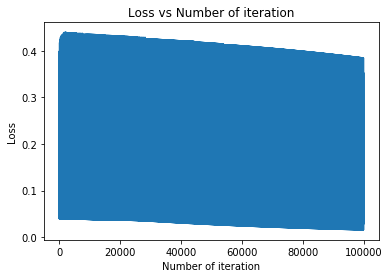

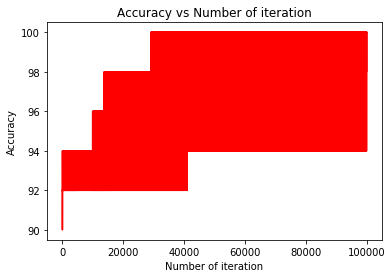

In [59]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of iteration")
plt.show()